# 计算机处理图像的方式和方法

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

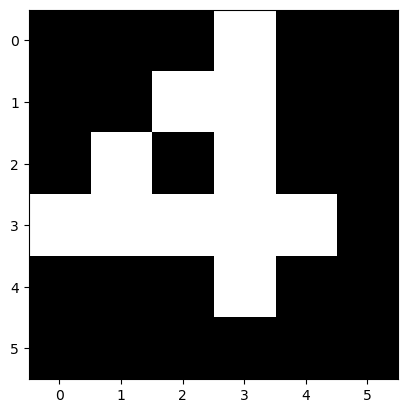

In [39]:
img0 = [[0,0,0,1,0,0], [0,0,1,1,0,0], [0,1,0,1,0,0],[1,1,1,1,1,0],[0,0,0,1,0,0],[0,0,0,0,0,0]]
plt.imshow(img0, cmap='gray')

## 图像的放大与缩小

In [40]:
img = cv2.imread('./assets/ComfyUI_temp.png', )
img = cv2.cvtColor(img, 4)
img.shape

(1024, 1024, 3)

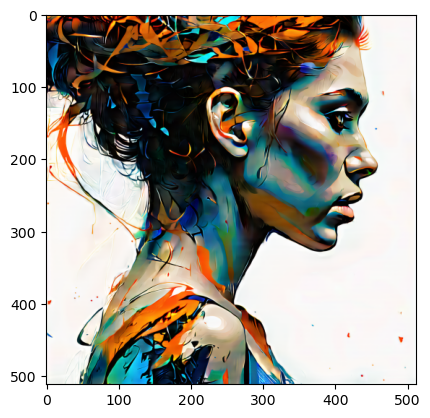

In [41]:
# 列，行
# img_0 = cv2.resize(img, (1025, 512)) 
img_0 = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation= cv2.INTER_LINEAR) 
plt.imshow(img_0)

## 图像的旋转平移

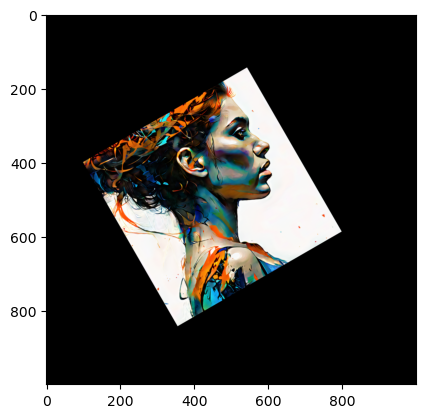

In [42]:
theta = -30/180 * 3.14
M = np.float32([[np.cos(theta), -np.sin(theta), 100], [np.sin(theta), np.cos(theta), 400]])
img_1 = cv2.warpAffine(img_0, M, (1000, 1000))
plt.imshow(img_1)

## 图像的旋转变换与拉伸变换

[[  1.26666667   0.6        -83.33333333]
 [  0.           1.33333333 -16.66666667]]


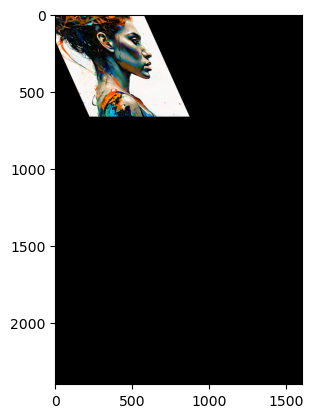

In [49]:
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 50], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pts1, pts2)
print(M)

theta = -0.4
# 变换矩阵，平移，斜切，旋转
cols = 800
rows = 800
dst = cv2.warpAffine(img_0, M, (cols*2, rows*3))
plt.imshow(dst)

[[ 9.11180584e-02  1.14923677e-02 -6.99885194e+00]
 [ 2.31850061e-02  1.12033285e-01 -1.97838524e+01]
 [-1.92956372e-03 -3.58049728e-04  1.00000000e+00]]


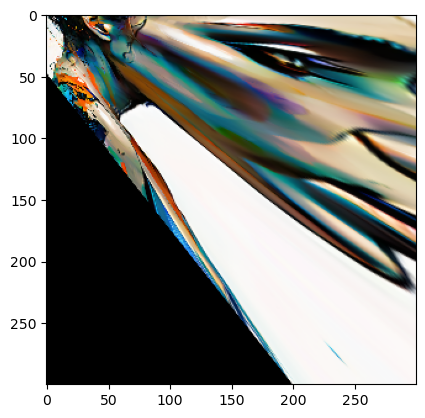

In [44]:
pts1 = np.float32([[56, 165], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [100, -20], [0, 30], [300, 300]])
M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

# 拉伸变换后者透视变换
dst = cv2.warpPerspective(img_0, M, (300, 300))
plt.imshow(dst)

## 图像滤波/卷积

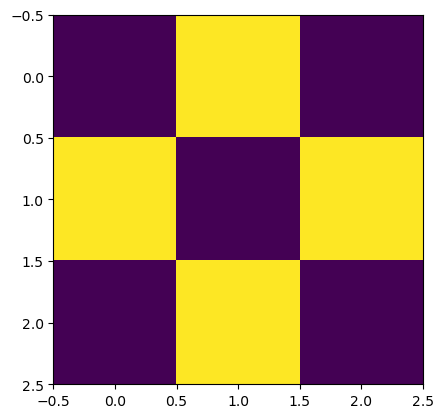

In [50]:
img = [[0, 10, 0], [10, 0, 10], [0, 10, 0]]
plt.imshow(img)

[[ 20 -20]
 [-20  20]]


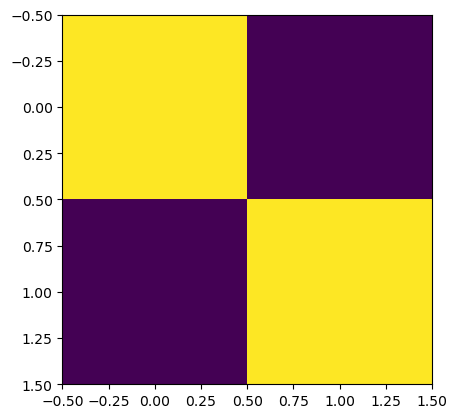

In [57]:
import scipy as sy
# filter = [[0.25, 0.25], [0.25, 0.25]]
kernel = [[-1, 1], [1, -1]]
result = sy.signal.convolve2d(img, kernel, mode='valid')
print(result)
plt.imshow(result)

In [58]:
kernel = np.ones((3, 3), np.float32) / (9)

## kernel = -kernel
kernel[0, :] = [-1, -1, -1]
kernel[1, :] = [0, 0, 0]
kernel[2, :] = [1, 1, 1]
print(kernel)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


(512, 512, 3)
[0 0 0]


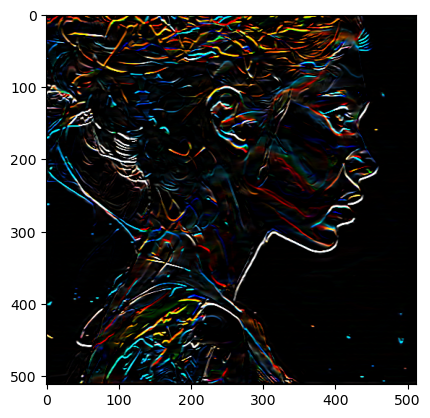

In [61]:
print(img_0.shape)
result = cv2.filter2D(img_0, -1, kernel)
result.shape
print(result[0, 0])
plt.imshow(result)